# Bank Marketing
The data set used here is from UCI machine learning repository. It is derived from the direct marketing campaigns of a Portuguese banking institution. The marketing campaigns were based on phone calls. 
Data set consistes of 41188 instances and 21 feature.
1. Client Data: Age, sex, job, marital status, education, loan status, credit status, housing status.
2. Last contact info: Contact, Month, Day of Week, Duration
3. Other: campaign', 'pdays','previous', 'poutcome'
4. Macroeconomic: Euribor 3 month rate, employment variation rate, consumer price index, andconsumer confidence index.

## Purposes:
1. to find out which factors give more influential effect to customers’ decision.
2. to make model to predict potential target consumer who will subscribe the term deposit. 

# Import Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
dfbank = pd.read_csv('bank-additional-full.csv', sep = ';')
pd.set_option('display.max_columns', None)
dfbank.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [3]:
dfbank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
age               41188 non-null int64
job               41188 non-null object
marital           41188 non-null object
education         41188 non-null object
default           41188 non-null object
housing           41188 non-null object
loan              41188 non-null object
contact           41188 non-null object
month             41188 non-null object
day_of_week       41188 non-null object
duration          41188 non-null int64
campaign          41188 non-null int64
pdays             41188 non-null int64
previous          41188 non-null int64
poutcome          41188 non-null object
emp.var.rate      41188 non-null float64
cons.price.idx    41188 non-null float64
cons.conf.idx     41188 non-null float64
euribor3m         41188 non-null float64
nr.employed       41188 non-null float64
y                 41188 non-null object
dtypes: float64(5), int64(5), object(11)
memory usa

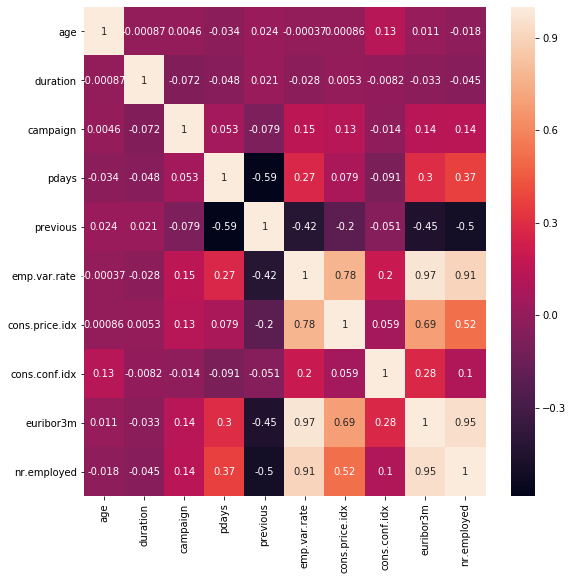

In [4]:
fig, ax = plt.subplots(figsize=(9,9))  
sns.heatmap(dfbank.corr(), annot=True)

In [5]:
dfbank.drop(columns=['emp.var.rate','nr.employed'], inplace=True)

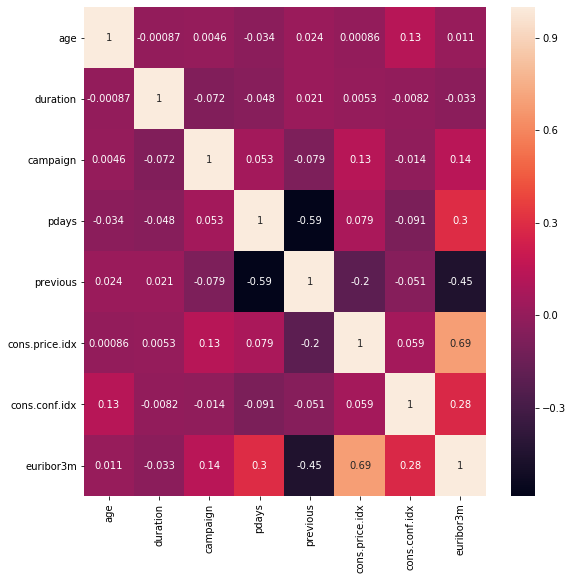

In [6]:
fig, ax = plt.subplots(figsize=(9,9))  
sns.heatmap(dfbank.corr(), annot=True)

# EDA

In [7]:
dfbank.describe()

,age,duration,campaign,pdays,previous,cons.price.idx,cons.conf.idx,euribor3m
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,93.575664,-40.502600,3.621291
std,10.42125,259.279249,2.770014,186.910907,0.494901,0.578840,4.628198,1.734447
min,17.00000,0.000000,1.000000,0.000000,0.000000,92.201000,-50.800000,0.634000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,93.075000,-42.700000,1.344000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,93.749000,-41.800000,4.857000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,93.994000,-36.400000,4.961000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,94.767000,-26.900000,5.045000


In [8]:
listItem = []
for col in dfbank.columns:
    listItem.append([col, dfbank[col].dtype, dfbank[col].isna().sum(),
                    round((dfbank[col].isna().sum()/len(dfbank[col])) * 100,2),
                    dfbank[col].nunique(), list(dfbank[col].unique()[:2])]);
dfDesc = pd.DataFrame(columns=['dataFeatures', 'dataType', 'null',
                              'nullPct', 'unique', 'uniqueSample'],
                     data = listItem)
dfDesc

,dataFeatures,dataType,null,nullPct,unique,uniqueSample
0,age,int64,0,0.0,78,"[56, 57]"
1,job,object,0,0.0,12,"[housemaid, services]"
2,marital,object,0,0.0,4,"[married, single]"
3,education,object,0,0.0,8,"[basic.4y, high.school]"
4,default,object,0,0.0,3,"[no, unknown]"
5,housing,object,0,0.0,3,"[no, yes]"
6,loan,object,0,0.0,3,"[no, yes]"
7,contact,object,0,0.0,2,"[telephone, cellular]"
8,month,object,0,0.0,10,"[may, jun]"
9,day_of_week,object,0,0.0,5,"[mon, tue]"


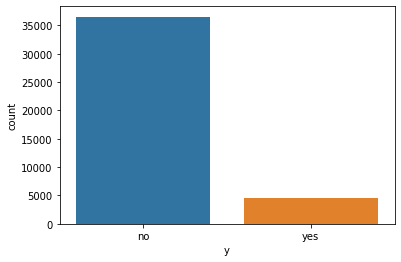

In [9]:
sns.countplot('y', data=dfbank)

In [10]:
dfbank['y'].value_counts()

no     36548
yes     4640
Name: y, dtype: int64

In [11]:
(dfbank['y'].value_counts()/len(dfbank))*100

no     88.734583
yes    11.265417
Name: y, dtype: float64

## 1. Client Data

In [12]:
dfbank.iloc[: , 0:7].head()

,age,job,marital,education,default,housing,loan
0,56,housemaid,married,basic.4y,no,no,no
1,57,services,married,high.school,unknown,no,no
2,37,services,married,high.school,no,yes,no
3,40,admin.,married,basic.6y,no,no,no
4,56,services,married,high.school,no,no,yes


### Age

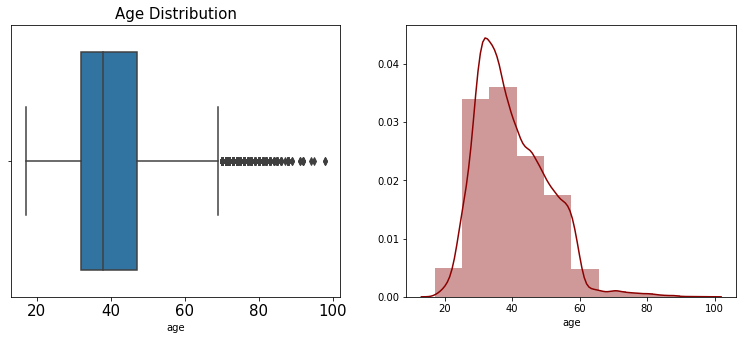

In [13]:
fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (13, 5))
sns.boxplot(x = 'age', data = dfbank, ax = ax1)
ax1.set_title('Age Distribution', fontsize=15)
ax1.tick_params(labelsize=15)

sns.distplot(dfbank['age'], kde=True, color='darkred', bins=10, ax=ax2)

In [14]:
# Quartiles
print('1º Quartile: ', dfbank['age'].quantile(q = 0.25))
print('2º Quartile: ', dfbank['age'].quantile(q = 0.50))
print('3º Quartile: ', dfbank['age'].quantile(q = 0.75))
print('4º Quartile: ', dfbank['age'].quantile(q = 1.00))

print('Ages above', dfbank['age'].quantile(q = 0.75) + 
                      1.5*(dfbank['age'].quantile(q = 0.75) - dfbank['age'].quantile(q = 0.25)), 'are outliers')

1º Quartile:  32.0
2º Quartile:  38.0
3º Quartile:  47.0
4º Quartile:  98.0
Ages above 69.5 are outliers


In [15]:
print('Banyaknya yes usia lebih dari 69.5: ', len(dfbank[(dfbank['age'] > 69.5) & (dfbank['y'] == 'yes')])/len(dfbank[(dfbank['age'] > 69.5)]))
print('Banyaknya no usia lebih dari 69.5: ', len(dfbank[(dfbank['age'] > 69.5) & (dfbank['y'] == 'no')])/len(dfbank[(dfbank['age'] > 69.5)]))

Banyaknya yes usia lebih dari 69.5:  0.47121535181236673
Banyaknya no usia lebih dari 69.5:  0.5287846481876333


In [16]:
print('Banyaknya yes usia kurang dari 69.5: ', len(dfbank[(dfbank['age'] <= 69.5) & (dfbank['y'] == 'yes')])/len(dfbank[(dfbank['age'] <= 69.5)]))
print('Banyaknya no usia kurang dari 69.5: ', len(dfbank[(dfbank['age'] <= 69.5) & (dfbank['y'] == 'no')])/len(dfbank[(dfbank['age'] <= 69.5)]))

Banyaknya yes usia kurang dari 69.5:  0.10852427613644736
Banyaknya no usia kurang dari 69.5:  0.8914757238635527


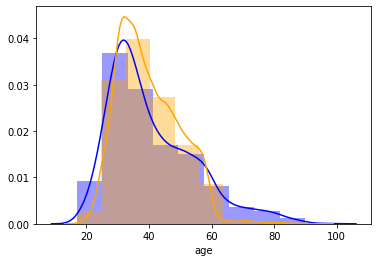

In [17]:
sns.distplot(dfbank[dfbank['y'] =='yes']['age'], color='blue', bins=10)
sns.distplot(dfbank[dfbank['y'] =='no']['age'], color='orange', bins=10)

### Job

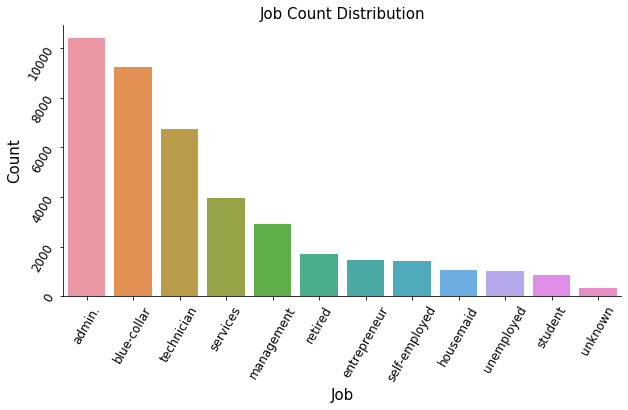

In [18]:
fig, ax = plt.subplots()
fig.set_size_inches(10, 5)
sns.countplot(x = 'job', data = dfbank, order=dfbank['job'].value_counts().index)
ax.set_xlabel('Job', fontsize=15)
ax.set_ylabel('Count', fontsize=15)
ax.set_title('Job Count Distribution', fontsize=15)
ax.tick_params(labelsize=12, rotation=60)
sns.despine()

In [19]:
#Type of job as proportion of the overall number of values
round(dfbank.job.value_counts()/dfbank.job.count()*100,2)

admin.           25.30
blue-collar      22.47
technician       16.37
services          9.64
management        7.10
retired           4.18
entrepreneur      3.54
self-employed     3.45
housemaid         2.57
unemployed        2.46
student           2.12
unknown           0.80
Name: job, dtype: float64

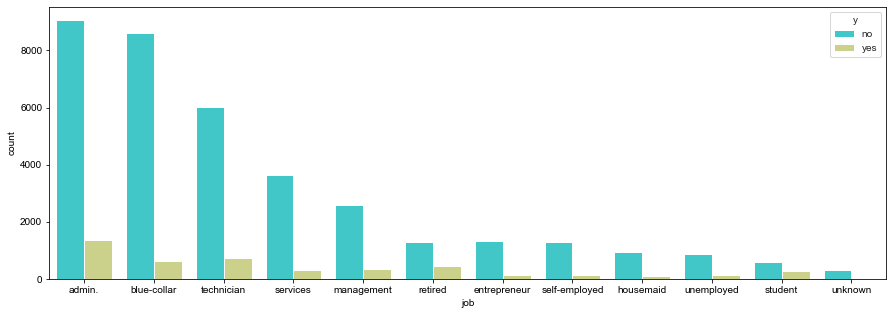

In [20]:
fig, ax = plt.subplots(figsize=(15,5))  
sns.set_style('whitegrid')
sns.countplot(x='job', hue='y', data=dfbank, palette='rainbow',order=dfbank['job'].value_counts().index)

In [21]:
listItem = []
for job in dfbank['job'].unique() :
    listItem.append([
        job,
        (len(
            dfbank[(dfbank['job'] == job) 
               & (dfbank['y'] == 'no')]
        )/len(dfbank[dfbank['job'] == job])) * 100,
        (len(
            dfbank[(dfbank['job'] == job) 
               & (dfbank['y'] == 'yes')]
        )/len(dfbank[dfbank['job'] == job])) * 100
    ])
dfJob = pd.DataFrame(listItem, columns=['Job','No %','Yes %'])
dfJob.sort_values(by=['Yes %'], ascending=False)

,Job,No %,Yes %
11,student,68.571429,31.428571
5,retired,74.767442,25.232558
7,unemployed,85.798817,14.201183
2,admin.,87.027442,12.972558
6,management,88.782490,11.217510
9,unknown,88.787879,11.212121
4,technician,89.173958,10.826042
8,self-employed,89.514426,10.485574
0,housemaid,90.000000,10.000000
10,entrepreneur,91.483516,8.516484


### Marital

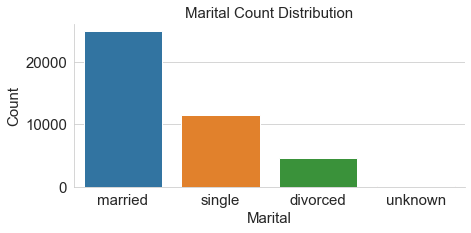

In [22]:
fig, ax = plt.subplots()
fig.set_size_inches(7, 3)
sns.countplot(x = 'marital', data = dfbank)
ax.set_xlabel('Marital', fontsize=15)
ax.set_ylabel('Count', fontsize=15)
ax.set_title('Marital Count Distribution', fontsize=15)
ax.tick_params(labelsize=15)
sns.despine()

In [23]:
# Marital status as proportion of the overall number of values
dfbank.marital.value_counts()/dfbank.marital.count()

married     0.605225
single      0.280859
divorced    0.111974
unknown     0.001942
Name: marital, dtype: float64

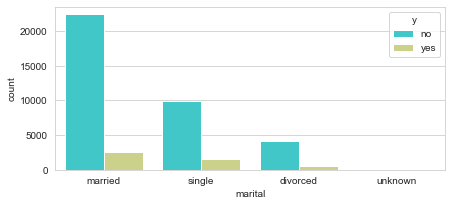

In [24]:
fig, ax = plt.subplots(figsize=(7,3))  
sns.set_style('whitegrid')
sns.countplot(x='marital', hue='y', data=dfbank, palette='rainbow')

### Education

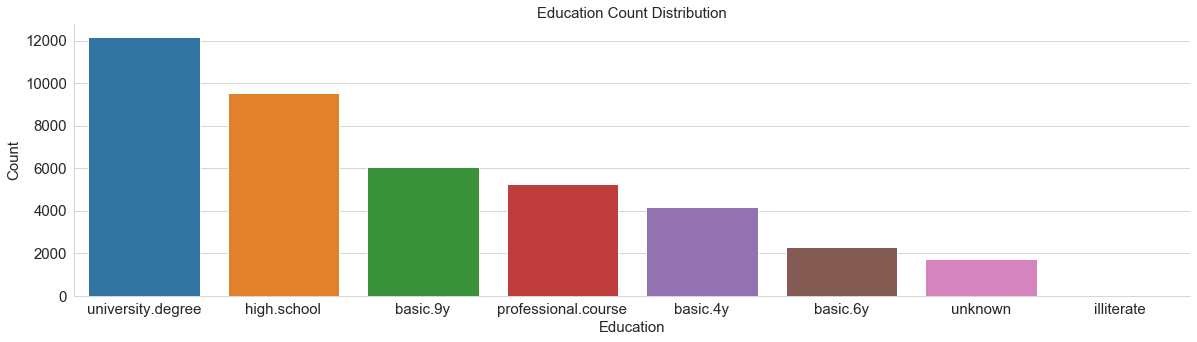

In [25]:
fig, ax = plt.subplots()
fig.set_size_inches(20, 5)
sns.countplot(x = 'education', data = dfbank, order=dfbank['education'].value_counts().index)
ax.set_xlabel('Education', fontsize=15)
ax.set_ylabel('Count', fontsize=15)
ax.set_title('Education Count Distribution', fontsize=15)
ax.tick_params(labelsize=15)
sns.despine()

In [26]:
#Education as proportion of the overall number of values
dfbank.education.value_counts()/dfbank.education.count()

university.degree      0.295426
high.school            0.231014
basic.9y               0.146766
professional.course    0.127294
basic.4y               0.101389
basic.6y               0.055647
unknown                0.042027
illiterate             0.000437
Name: education, dtype: float64

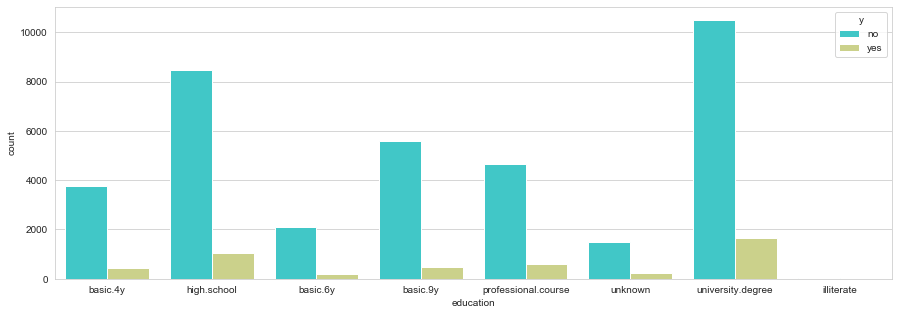

In [27]:
fig, ax = plt.subplots(figsize=(15,5))  
sns.set_style('whitegrid')
sns.countplot(x='education', hue='y', data=dfbank, palette='rainbow')

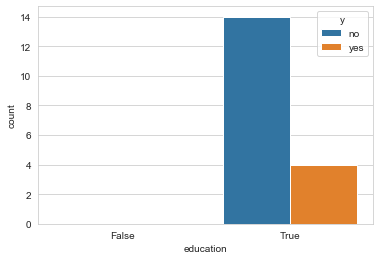

In [28]:
sns.countplot(x=dfbank['education']=='illiterate', hue=dfbank[dfbank['education']=='illiterate']['y'])

### Credit, Housing, Loan

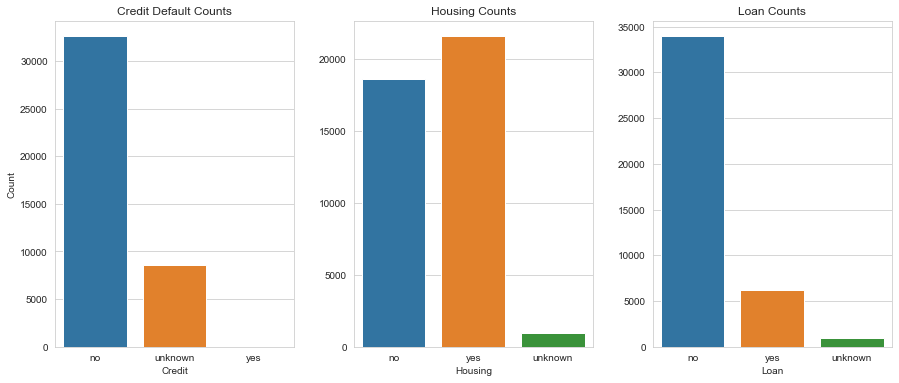

In [29]:
fig, (ax1, ax2, ax3) = plt.subplots(nrows = 1, ncols = 3, figsize = (15,6))
sns.countplot(dfbank['default'], ax = ax1)
ax1.set_xlabel('Credit', fontsize = 10)
ax1.set_ylabel('Count', fontsize = 10)
ax1.set_title('Credit Default Counts')
ax1.tick_params(labelsize=10)

sns.countplot(dfbank['housing'], ax = ax2,)
ax2.set_xlabel('Housing', fontsize = 10)
ax2.set_ylabel('')
ax2.set_title('Housing Counts')
ax2.tick_params(labelsize=10)

sns.countplot(dfbank['loan'], ax = ax3)
ax3.set_xlabel('Loan', fontsize = 10)
ax3.set_ylabel('')
ax3.set_title('Loan Counts')
ax3.tick_params(labelsize=10)

plt.subplots_adjust(wspace=0.25)

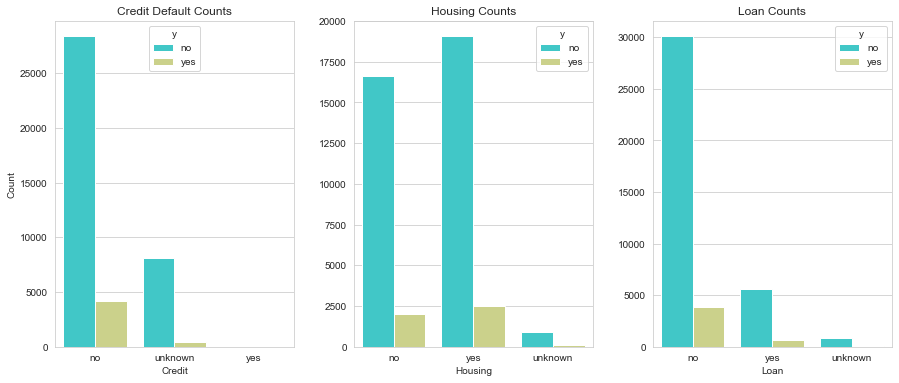

In [30]:
fig, (ax1, ax2, ax3) = plt.subplots(nrows = 1, ncols = 3, figsize = (15,6))
sns.countplot(x='default', hue='y', data=dfbank, palette='rainbow', ax = ax1)
ax1.set_xlabel('Credit', fontsize = 10)
ax1.set_ylabel('Count', fontsize = 10)
ax1.set_title('Credit Default Counts')
ax1.tick_params(labelsize=10)

sns.countplot(x='housing', hue='y', data=dfbank, palette='rainbow', ax = ax2)
ax2.set_xlabel('Housing', fontsize = 10)
ax2.set_ylabel('')
ax2.set_title('Housing Counts')
ax2.tick_params(labelsize=10)

sns.countplot(x='loan', hue='y', data=dfbank, palette='rainbow', ax = ax3)
ax3.set_xlabel('Loan', fontsize = 10)
ax3.set_ylabel('')
ax3.set_title('Loan Counts')
ax3.tick_params(labelsize=10)

plt.subplots_adjust(wspace=0.25)

In [31]:
dfbank[dfbank['default']=='yes']

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,cons.price.idx,cons.conf.idx,euribor3m,y
21580,48,technician,married,professional.course,yes,no,no,cellular,aug,tue,66,1,999,0,nonexistent,93.444,-36.1,4.963,no
21581,48,technician,married,professional.course,yes,yes,no,cellular,aug,tue,133,1,999,0,nonexistent,93.444,-36.1,4.963,no
24866,31,unemployed,married,high.school,yes,no,no,cellular,nov,tue,111,2,999,1,failure,93.200,-42.0,4.153,no


In [32]:
listItem = []
for loan in dfbank['loan'].unique() :
    listItem.append([
        loan,
        (len(
            dfbank[(dfbank['loan'] == loan) 
               & (dfbank['y'] == 'no')]
        )/len(dfbank[dfbank['loan'] == loan])) * 100,
        (len(
            dfbank[(dfbank['loan'] == loan) 
               & (dfbank['y'] == 'yes')]
        )/len(dfbank[dfbank['loan'] == loan])) * 100
    ])
dfJob = pd.DataFrame(listItem, columns=['Job','No %','Yes %'])
dfJob.sort_values(by=['Yes %'], ascending=False)

,Job,No %,Yes %
0,no,88.659794,11.340206
1,yes,89.068502,10.931498
2,unknown,89.191919,10.808081


## 2. Last Contact Info

In [33]:
dfbank.iloc[: , 7:11].head()

,contact,month,day_of_week,duration
0,telephone,may,mon,261
1,telephone,may,mon,149
2,telephone,may,mon,226
3,telephone,may,mon,151
4,telephone,may,mon,307


### Contact, Month, Day of Week

In [34]:
print("Kind of Contact: \n", dfbank['contact'].unique())
print("\nWhich monthis this campaign work: \n", dfbank['month'].unique())
print("\nWhich days of week this campaing work: \n", dfbank['day_of_week'].unique())

Kind of Contact: 
 ['telephone' 'cellular']

Which monthis this campaign work: 
 ['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'mar' 'apr' 'sep']

Which days of week this campaing work: 
 ['mon' 'tue' 'wed' 'thu' 'fri']


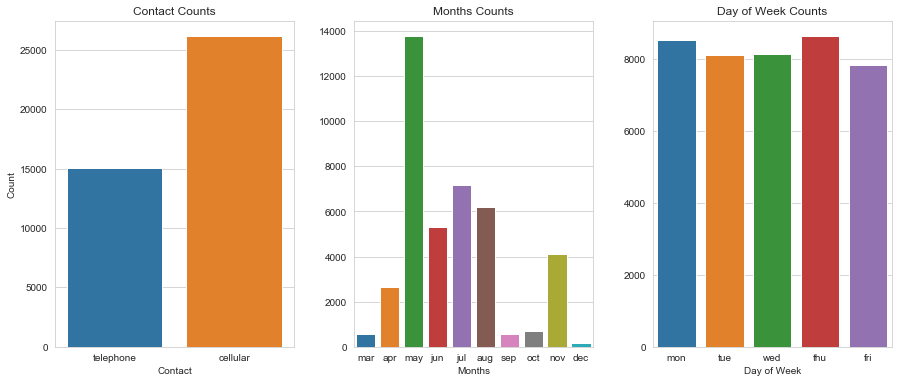

In [35]:
fig, (ax1, ax2, ax3) = plt.subplots(nrows = 1, ncols = 3, figsize = (15,6))
sns.countplot(dfbank['contact'], ax = ax1)
ax1.set_xlabel('Contact', fontsize = 10)
ax1.set_ylabel('Count', fontsize = 10)
ax1.set_title('Contact Counts')
ax1.tick_params(labelsize=10)

sns.countplot(dfbank['month'], ax = ax2, order = ['mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec'])
ax2.set_xlabel('Months', fontsize = 10)
ax2.set_ylabel('')
ax2.set_title('Months Counts')
ax2.tick_params(labelsize=10)

sns.countplot(dfbank['day_of_week'], ax = ax3)
ax3.set_xlabel('Day of Week', fontsize = 10)
ax3.set_ylabel('')
ax3.set_title('Day of Week Counts')
ax3.tick_params(labelsize=10)

plt.subplots_adjust(wspace=0.25)


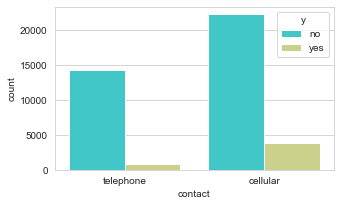

In [36]:
fig, ax = plt.subplots(figsize=(5,3))  
sns.set_style('whitegrid')
sns.countplot(x='contact', hue='y', data=dfbank, palette='rainbow')

In [37]:
listitem = []
for contact in dfbank['contact'].unique():
    listitem.append([contact,(len(dfbank[(dfbank['contact'] == contact)& (dfbank['y'] == 'no')])/len (dfbank[dfbank['contact'] == contact]))*100,(len(dfbank[(dfbank['contact'] == contact) & (dfbank['y'] == 'yes')]) /len (dfbank[dfbank['contact'] == contact]))*100])
dfCon = pd.DataFrame(listitem, columns=['Contact','No %','Yes %'])
dfCon

,Contact,No %,Yes %
0,telephone,94.768679,5.231321
1,cellular,85.262393,14.737607


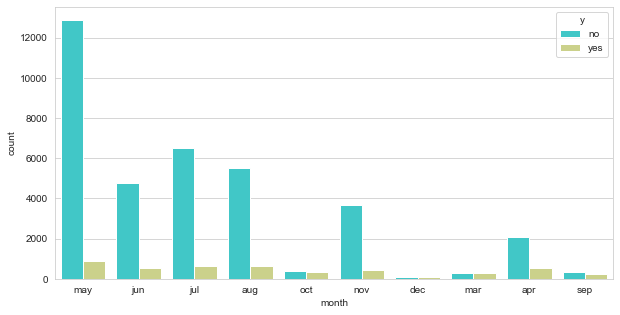

In [38]:
fig, ax = plt.subplots(figsize=(10,5))  
sns.set_style('whitegrid')
sns.countplot(x='month', hue='y', data=dfbank, palette='rainbow')

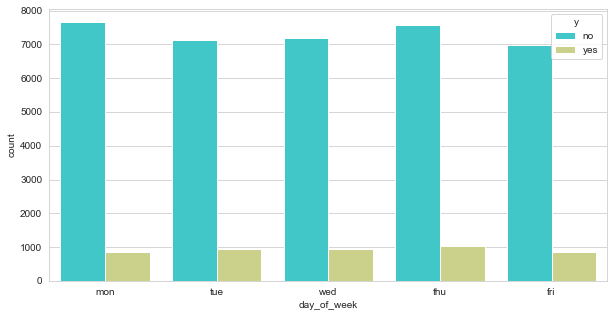

In [39]:
fig, ax = plt.subplots(figsize=(10,5))  
sns.set_style('whitegrid')
sns.countplot(x='day_of_week', hue='y', data=dfbank, palette='rainbow')

In [40]:
listitem = []
for day in dfbank['day_of_week'].unique():
    listitem.append([
        day,
        (len(
        dfbank[(dfbank['day_of_week'] == day)
               & (dfbank['y'] == 'no')])
        /len (dfbank[dfbank['day_of_week'] == day]))*100,
        (len(
        dfbank[(dfbank['day_of_week'] == day)
               & (dfbank['y'] == 'yes')])
        /len (dfbank[dfbank['day_of_week'] == day]))*100
    ])
dfDay = pd.DataFrame(listitem, columns=['Day','No %','Yes %'])
dfDay

,Day,No %,Yes %
0,mon,90.051680,9.948320
1,tue,88.220025,11.779975
2,wed,88.332924,11.667076
3,thu,87.881248,12.118752
4,fri,89.191261,10.808739


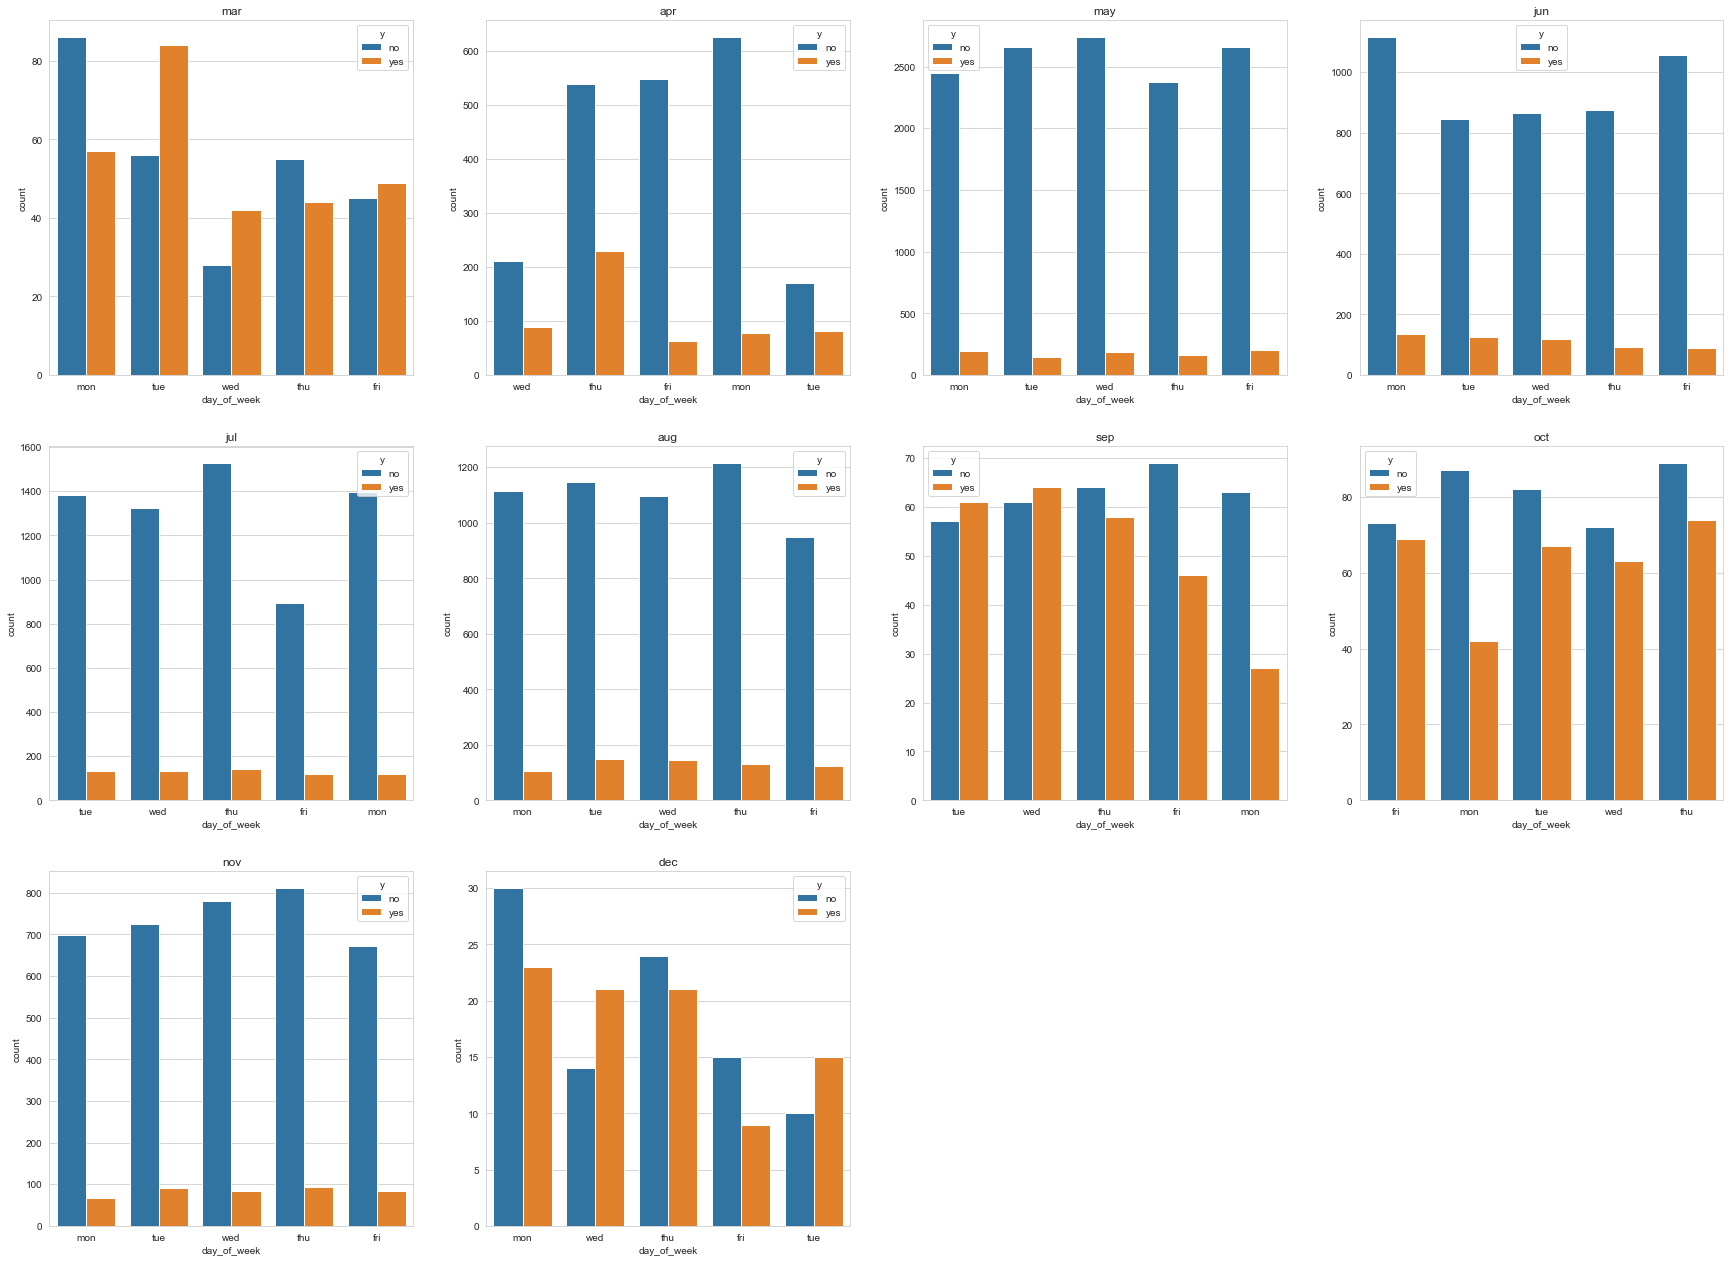

In [41]:
month=['mar', 'apr', 'may', 'jun','jul', 'aug', 'sep','oct', 'nov', 'dec']
plt.figure(figsize=(30,30))
for item in range(len(month)):
    plt.subplot(4,4,item+1)
    plt.title(month[item])
    sns.countplot(x=dfbank[dfbank['month']==month[item]]['day_of_week'],hue=dfbank['y'])

### Duration

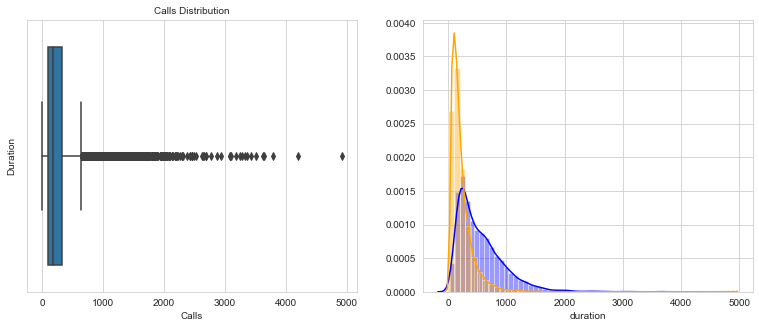

In [42]:
fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (13, 5))
sns.boxplot(x = 'duration', data = dfbank, ax = ax1)
ax1.set_xlabel('Calls', fontsize=10)
ax1.set_ylabel('Duration', fontsize=10)
ax1.set_title('Calls Distribution', fontsize=10)
ax1.tick_params(labelsize=10)

sns.distplot(dfbank[dfbank['y'] =='yes']['duration'], color='blue', ax=ax2)
sns.distplot(dfbank[dfbank['y'] =='no']['duration'], color='orange', ax=ax2)

In [43]:
# Quartiles
print('1º Quartile: ', dfbank['duration'].quantile(q = 0.25))
print('2º Quartile: ', dfbank['duration'].quantile(q = 0.50))
print('3º Quartile: ', dfbank['duration'].quantile(q = 0.75))
print('4º Quartile: ', dfbank['duration'].quantile(q = 1.00))
#Calculate the outliers:
  # Interquartile range, IQR = Q3 - Q1
  # lower 1.5*IQR whisker = Q1 - 1.5 * IQR 
  # Upper 1.5*IQR whisker = Q3 + 1.5 * IQR
    
print('Duration calls above: ', dfbank['duration'].quantile(q = 0.75) + 
                      1.5*(dfbank['duration'].quantile(q = 0.75) - dfbank['duration'].quantile(q = 0.25)), 'are outliers')

1º Quartile:  102.0
2º Quartile:  180.0
3º Quartile:  319.0
4º Quartile:  4918.0
Duration calls above:  644.5 are outliers


In [44]:
print('Numerber of outliers: ', dfbank[dfbank['duration'] > 644.5]['duration'].count())
print('Number of clients: ', len(dfbank))
#Outliers in %
print('Outliers are:', round(dfbank[dfbank['duration'] > 644.5]['duration'].count()*100/len(dfbank),2), '%')

Numerber of outliers:  2963
Number of clients:  41188
Outliers are: 7.19 %


In [45]:
print('Banyaknya yes durasi lebih dari 644.5: ', len(dfbank[(dfbank['duration'] > 644.5) & (dfbank['y'] == 'yes')])/len(dfbank[(dfbank['duration'] > 644.5)]))
print('Banyaknya no durasi lebih dari 644.5: ', len(dfbank[(dfbank['duration'] > 644.5) & (dfbank['y'] == 'no')])/len(dfbank[(dfbank['duration'] > 644.5)]))

Banyaknya yes durasi lebih dari 644.5:  0.5150185622679716
Banyaknya no durasi lebih dari 644.5:  0.48498143773202834


In [46]:
print("Max duration  call in minutes:  ", round((dfbank['duration'].max()/60),1))
print("Min duration  call in minutes:   ", round((dfbank['duration'].min()/60),1))
print("Mean duration call in minutes:   ", round((dfbank['duration'].mean()/60),1))
print("STD duration  call in minutes:   ", round((dfbank['duration'].std()/60),1))

Max duration  call in minutes:   82.0
Min duration  call in minutes:    0.0
Mean duration call in minutes:    4.3
STD duration  call in minutes:    4.3


In [47]:
print('durasi kontak minimal konsumen yang menerima tawaran adalah: ', 
      round((dfbank[dfbank['y'] == 'yes']['duration'].min())/60,2), 'menit')
print('durasi kontak maksimal konsumen yang menerima tawaran adalah: ', 
      round((dfbank[dfbank['y'] == 'yes']['duration'].max())/60,2), 'menit')

durasi kontak minimal konsumen yang menerima tawaran adalah:  0.62 menit
durasi kontak maksimal konsumen yang menerima tawaran adalah:  69.98 menit


In [48]:
print('durasi kontak minimal konsumen yang menolak tawaran adalah: ', 
      round((dfbank[dfbank['y'] == 'no']['duration'].min())/60,2), 'menit')
print('durasi kontak maksimal konsumen yang menolak tawaran adalah: ', 
      round((dfbank[dfbank['y'] == 'no']['duration'].max())/60,2), 'menit')

durasi kontak minimal konsumen yang menolak tawaran adalah:  0.0 menit
durasi kontak maksimal konsumen yang menolak tawaran adalah:  81.97 menit


In [49]:
dfbank[(dfbank['duration'] == 0)]

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,cons.price.idx,cons.conf.idx,euribor3m,y
6251,39,admin.,married,high.school,no,yes,no,telephone,may,tue,0,4,999,0,nonexistent,93.994,-36.4,4.857,no
23031,59,management,married,university.degree,no,yes,no,cellular,aug,tue,0,10,999,0,nonexistent,93.444,-36.1,4.965,no
28063,53,blue-collar,divorced,high.school,no,yes,no,cellular,apr,fri,0,3,999,0,nonexistent,93.075,-47.1,1.479,no
33015,31,blue-collar,married,basic.9y,no,no,no,cellular,may,mon,0,2,999,0,nonexistent,92.893,-46.2,1.299,no


## 3. Other

In [50]:
dfbank.loc[: , ['campaign', 'pdays','previous', 'poutcome']].head()

,campaign,pdays,previous,poutcome
0,1,999,0,nonexistent
1,1,999,0,nonexistent
2,1,999,0,nonexistent
3,1,999,0,nonexistent
4,1,999,0,nonexistent


### Campaign

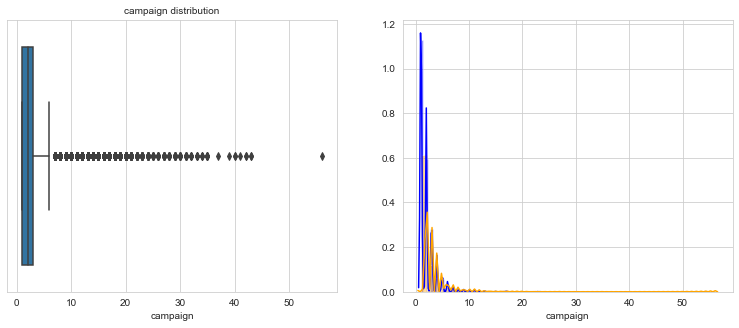

In [51]:
fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (13, 5))
sns.boxplot(x = 'campaign', data = dfbank, ax = ax1)
ax1.set_title('campaign distribution', fontsize=10)
ax1.tick_params(labelsize=10)


sns.distplot(dfbank[dfbank['y'] =='yes']['campaign'], color='blue', ax = ax2)
sns.distplot(dfbank[dfbank['y'] =='no']['campaign'], color='orange', ax = ax2)

In [52]:
dfbank['campaign'].value_counts()

1     17642
2     10570
3      5341
4      2651
5      1599
6       979
7       629
8       400
9       283
10      225
11      177
12      125
13       92
14       69
17       58
15       51
16       51
18       33
20       30
19       26
21       24
22       17
23       16
24       15
27       11
29       10
25        8
26        8
28        8
30        7
31        7
35        5
33        4
32        4
34        3
40        2
42        2
43        2
37        1
39        1
41        1
56        1
Name: campaign, dtype: int64

### Pdays

In [53]:
dfbank['pdays'].value_counts().sort_index(ascending=True)

0         15
1         26
2         61
3        439
4        118
5         46
6        412
7         60
8         18
9         64
10        52
11        28
12        58
13        36
14        20
15        24
16        11
17         8
18         7
19         3
20         1
21         2
22         3
25         1
26         1
27         1
999    39673
Name: pdays, dtype: int64

In [54]:
len(dfbank[dfbank['pdays']==999])/len(dfbank)

0.9632174419733903

In [55]:
len(dfbank[dfbank['pdays']!=999])/len(dfbank)

0.036782558026609694

### Previous

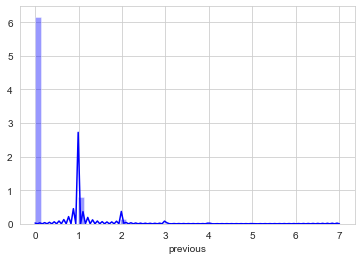

In [56]:
sns.distplot(dfbank['previous'], color='blue')

In [57]:
dfbank['previous'].value_counts()

0    35563
1     4561
2      754
3      216
4       70
5       18
6        5
7        1
Name: previous, dtype: int64

In [58]:
len(dfbank[dfbank['previous']==0])/len(dfbank)

0.8634310964358551

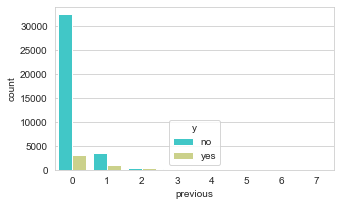

In [59]:
fig, ax = plt.subplots(figsize=(5,3))  
sns.set_style('whitegrid')
sns.countplot(x='previous', hue='y', data=dfbank, palette='rainbow')

### P.Outcome

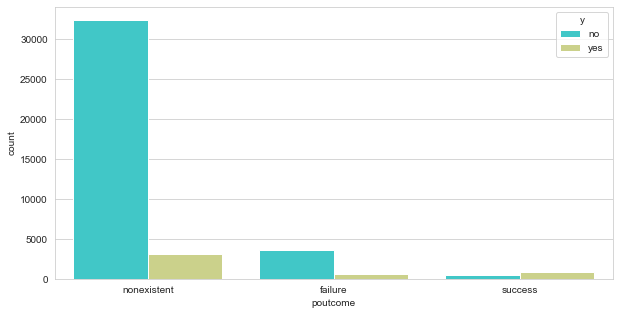

In [60]:
fig, ax = plt.subplots(figsize=(10,5))  
sns.set_style('whitegrid')
sns.countplot(x='poutcome', hue='y', data=dfbank, palette='rainbow')

In [61]:
listitem = []
for outcome in dfbank['poutcome'].unique():
    listitem.append([
        outcome,
        (len(
        dfbank[(dfbank['poutcome'] == outcome)
               & (dfbank['y'] == 'no')])
        /len (dfbank[dfbank['poutcome'] == outcome]))*100,
        (len(
        dfbank[(dfbank['poutcome'] == outcome)
               & (dfbank['y'] == 'yes')])
        /len (dfbank[dfbank['poutcome'] == outcome]))*100
    ])
dfOut = pd.DataFrame(listitem, columns=['POutcome','No %','Yes %'])
dfOut

,POutcome,No %,Yes %
0,nonexistent,91.167787,8.832213
1,failure,85.771402,14.228598
2,success,34.887109,65.112891


In [62]:
print(len(dfbank[(dfbank['poutcome']=='nonexistent') & (dfbank['y']=='yes')]))
print(len(dfbank[(dfbank['poutcome']!='nonexistent') & (dfbank['y']=='yes')]))

3141
1499


## 4. Macroeconomic

In [63]:
dfbank.loc[: , ['cons.price.idx', 'cons.conf.idx', 'euribor3m']].head()

,cons.price.idx,cons.conf.idx,euribor3m
0,93.994,-36.4,4.857
1,93.994,-36.4,4.857
2,93.994,-36.4,4.857
3,93.994,-36.4,4.857
4,93.994,-36.4,4.857


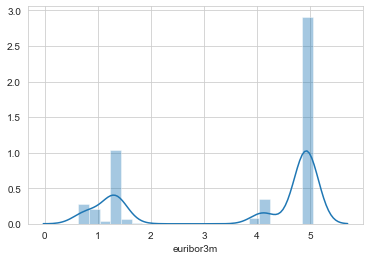

In [64]:
sns.distplot(dfbank['euribor3m'])

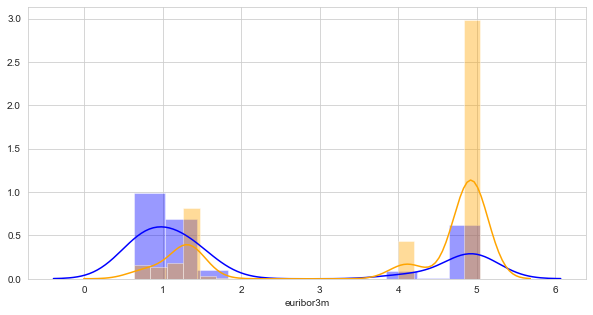

In [65]:
plt.figure(figsize=(10,5))
sns.distplot(dfbank[dfbank['y'] =='yes']['euribor3m'], color='blue')
sns.distplot(dfbank[dfbank['y'] =='no']['euribor3m'], color='orange')

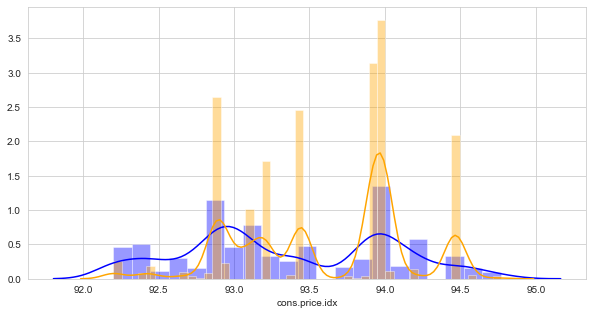

In [66]:
plt.figure(figsize=(10,5))
sns.distplot(dfbank[dfbank['y'] =='yes']['cons.price.idx'], color='blue')
sns.distplot(dfbank[dfbank['y'] =='no']['cons.price.idx'], color='orange')

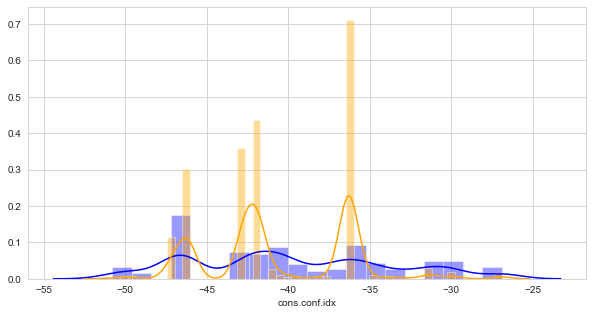

In [67]:
plt.figure(figsize=(10,5))
sns.distplot(dfbank[dfbank['y'] =='yes']['cons.conf.idx'], color='blue')
sns.distplot(dfbank[dfbank['y'] =='no']['cons.conf.idx'], color='orange')

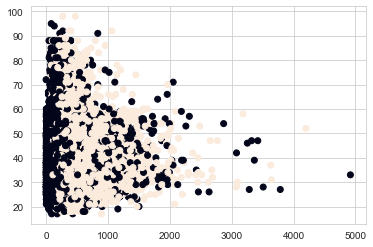

In [123]:
plt.scatter(df_cleaned['duration'],df_cleaned['age'],c=df_cleaned['y'])

## Dealing with Unimportant Data

In [68]:
#Creating a copy of the original data frame
df_cleaned = dfbank.copy()

#Dropping the unknown job level
# df_cleaned = df_cleaned[df_cleaned.job != 'unknown']

#Dropping the unknown marital status
# df_cleaned = df_cleaned[df_cleaned.marital != 'unknown']

#Dropping the unknown and illiterate education level
# df_cleaned = df_cleaned[df_cleaned.education != 'unknown']
# df_cleaned = df_cleaned[df_cleaned.education != 'illiterate']

#Dropping the unknown housing loan status
# df_cleaned = df_cleaned[df_cleaned.housing != 'unknown']

#Dropping the unknown personal loan status
df_cleaned = df_cleaned[df_cleaned.loan != 'unknown']

#Dropping duration 0
df_cleaned = df_cleaned[df_cleaned.duration != 0]

#Dropping column Default
df_cleaned = df_cleaned.drop('default', axis=1)


df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40194 entries, 0 to 41187
Data columns (total 18 columns):
age               40194 non-null int64
job               40194 non-null object
marital           40194 non-null object
education         40194 non-null object
housing           40194 non-null object
loan              40194 non-null object
contact           40194 non-null object
month             40194 non-null object
day_of_week       40194 non-null object
duration          40194 non-null int64
campaign          40194 non-null int64
pdays             40194 non-null int64
previous          40194 non-null int64
poutcome          40194 non-null object
cons.price.idx    40194 non-null float64
cons.conf.idx     40194 non-null float64
euribor3m         40194 non-null float64
y                 40194 non-null object
dtypes: float64(3), int64(5), object(10)
memory usage: 5.8+ MB


### Encoder

In [69]:
#Substituting the string predictor variable values with numbers
df_cleaned.y.replace(['yes'], 1, inplace=True)
df_cleaned.y.replace(['no'], 0, inplace=True)

bank_final = pd.get_dummies(df_cleaned, drop_first=True)
bank_final = bank_final.drop('y', axis=1)

# Model Testing

In [70]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(bank_final, df_cleaned['y'], test_size = 0.3, random_state = 101)

### Random Forest Classifier

In [71]:
from sklearn.ensemble import RandomForestClassifier

In [72]:
rfc= RandomForestClassifier(n_estimators=100, random_state=101)
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=101,
                       verbose=0, warm_start=False)

duration            0.294037
euribor3m           0.127288
age                 0.090511
campaign            0.043164
cons.price.idx      0.040437
cons.conf.idx       0.037238
pdays               0.033579
previous            0.017213
job_blue-collar     0.009447
job_entrepreneur    0.003936
dtype: float64

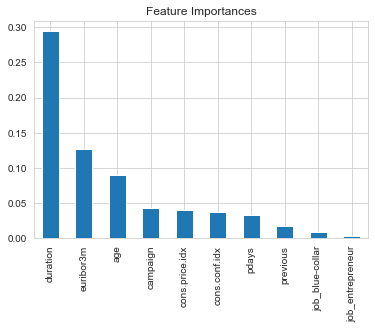

In [73]:
coef1 = pd.Series(rfc.feature_importances_, X_train.columns)[:10].sort_values(ascending=False)
coef1.plot(kind='bar', title='Feature Importances')
coef1

In [74]:
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, accuracy_score, auc, log_loss, roc_auc_score, f1_score

In [75]:
predictTrain = rfc.predict(X_train)

con = pd.DataFrame(data=confusion_matrix(y_train, predictTrain), columns=['P No', 'P Yes'],
                  index =['A No', 'A Yes'])
print(con)

print(classification_report(y_train, predictTrain))

        P No  P Yes
A No   24956      0
A Yes      0   3179
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     24956
           1       1.00      1.00      1.00      3179

    accuracy                           1.00     28135
   macro avg       1.00      1.00      1.00     28135
weighted avg       1.00      1.00      1.00     28135



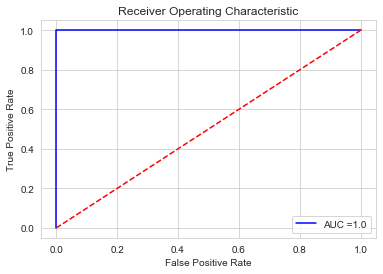

In [76]:
predictProbTrain = rfc.predict_proba(X_train)

# calculate the fpr and tpr for all thresholds of the classification
preds = predictProbTrain[:,1]
fpr,tpr,threshold = roc_curve(y_train, preds)
roc_auc = auc(fpr, tpr)

# merhod I: plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr,tpr,'b', label ='AUC ={}'.format(round(roc_auc,2)))
plt.legend(loc='lower right')
plt.plot([0, 1], [0,1], 'r--')
# plt.xlim([0, 1])
# plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [77]:
log_loss(y_train, predictProbTrain[:,1])

0.04833391217981146

In [78]:
predictTest = rfc.predict(X_test)

con = pd.DataFrame(data=confusion_matrix(y_test, predictTest), columns=['P No', 'P Yes'],
                  index = ['A No', 'A Yes']);
print(con)

print(classification_report(y_test, predictTest))

        P No  P Yes
A No   10353    352
A Yes    707    647
              precision    recall  f1-score   support

           0       0.94      0.97      0.95     10705
           1       0.65      0.48      0.55      1354

    accuracy                           0.91     12059
   macro avg       0.79      0.72      0.75     12059
weighted avg       0.90      0.91      0.91     12059



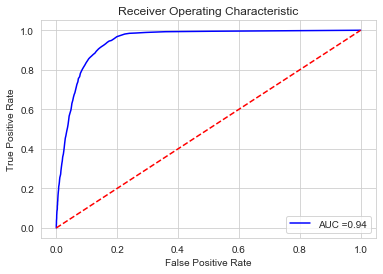

In [79]:
predictProbTest = rfc.predict_proba(X_test)

# calculate the fpr and tpr for all thresholds of the classification
preds = predictProbTest[:,1]
fpr,tpr,threshold = roc_curve(y_test, preds)
roc_auc = auc(fpr, tpr)

# merhod I: plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr,tpr,'b', label ='AUC ={}'.format(round(roc_auc,2)))
plt.legend(loc='lower right')
plt.plot([0, 1], [0,1], 'r--')
# plt.xlim([0, 1])
# plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

### Gradient Boosting Classifier

In [80]:
from sklearn.ensemble import GradientBoostingClassifier

gbc = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1)

In [81]:
gbc.fit(X_train, y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='auto',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

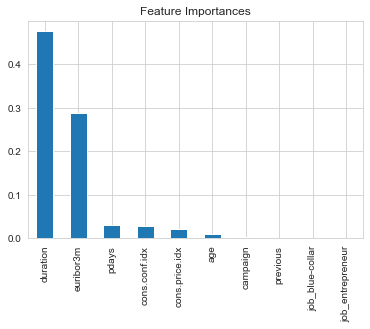

In [82]:
coef1 = pd.Series(gbc.feature_importances_, X_train.columns)[:10].sort_values(ascending=False)
coef1.plot(kind='bar', title='Feature Importances')

In [83]:
testpredict = gbc.predict(X_test)

In [84]:
print(confusion_matrix(y_test, testpredict))
print(classification_report(y_test, testpredict))

[[10315   390]
 [  640   714]]
              precision    recall  f1-score   support

           0       0.94      0.96      0.95     10705
           1       0.65      0.53      0.58      1354

    accuracy                           0.91     12059
   macro avg       0.79      0.75      0.77     12059
weighted avg       0.91      0.91      0.91     12059



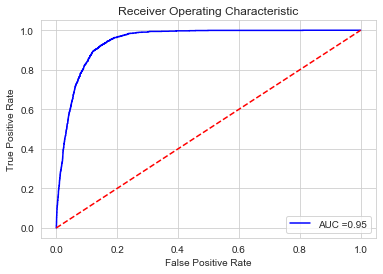

In [85]:
predictProbTest = gbc.predict_proba(X_test)

# calculate the fpr and tpr for all thresholds of the classification
preds = predictProbTest[:,1]
fpr,tpr,threshold = roc_curve(y_test, preds)
roc_auc = auc(fpr, tpr)

# merhod I: plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr,tpr,'b', label ='AUC ={}'.format(round(roc_auc,2)))
plt.legend(loc='lower right')
plt.plot([0, 1], [0,1], 'r--')
# plt.xlim([0, 1])
# plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

### XGB Classifier

In [86]:
from xgboost import XGBClassifier

In [87]:
xgb = XGBClassifier(n_estimators=100, learning_rate=0.1)

In [88]:
xgb.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

duration            0.191266
euribor3m           0.127647
pdays               0.097264
cons.price.idx      0.044061
cons.conf.idx       0.039393
job_blue-collar     0.023546
previous            0.017183
age                 0.011715
campaign            0.010454
job_entrepreneur    0.000000
dtype: float32

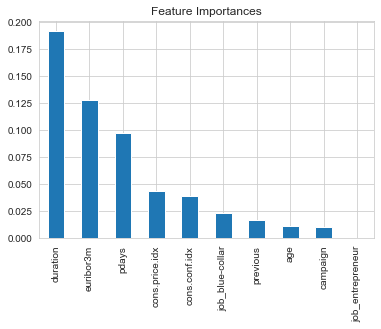

In [89]:
coef1 = pd.Series(xgb.feature_importances_, X_train.columns)[:10].sort_values(ascending=False)
coef1.plot(kind='bar', title='Feature Importances')
coef1

In [90]:
testpredict = xgb.predict(X_test)

In [91]:
print(confusion_matrix(y_test, testpredict))
print(classification_report(y_test, testpredict))

[[10357   348]
 [  685   669]]
              precision    recall  f1-score   support

           0       0.94      0.97      0.95     10705
           1       0.66      0.49      0.56      1354

    accuracy                           0.91     12059
   macro avg       0.80      0.73      0.76     12059
weighted avg       0.91      0.91      0.91     12059



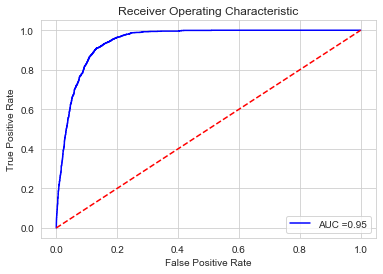

In [92]:
predictProbTest = xgb.predict_proba(X_test)

# calculate the fpr and tpr for all thresholds of the classification
preds = predictProbTest[:,1]
fpr,tpr,threshold = roc_curve(y_test, preds)
roc_auc = auc(fpr, tpr)

# merhod I: plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr,tpr,'b', label ='AUC ={}'.format(round(roc_auc,2)))
plt.legend(loc='lower right')
plt.plot([0, 1], [0,1], 'r--')
# plt.xlim([0, 1])
# plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# Gridsearch

In [93]:
from sklearn.model_selection import GridSearchCV

parameters = {'learning_rate': (0.1,0.05, 0.01),
             'min_samples_leaf': (1,3,5)
             }
                
gbc2 = GradientBoostingClassifier()
dt = GridSearchCV(gbc, parameters, 
                  scoring = ['precision','roc_auc'],
                  refit='precision',
                  cv=5)
dt.fit(X_train, y_train)
dt.best_estimator_

GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.01, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='auto',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [94]:
gbc2 = dt.best_estimator_

In [95]:
predictTest = gbc2.predict(X_test)

con = pd.DataFrame(data=confusion_matrix(y_test, predictTest), columns=['P No', 'P Yes'],
                  index = ['A No', 'A Yes']);
print(con)

print(classification_report(y_test,predictTest))

        P No  P Yes
A No   10644     61
A Yes   1134    220
              precision    recall  f1-score   support

           0       0.90      0.99      0.95     10705
           1       0.78      0.16      0.27      1354

    accuracy                           0.90     12059
   macro avg       0.84      0.58      0.61     12059
weighted avg       0.89      0.90      0.87     12059



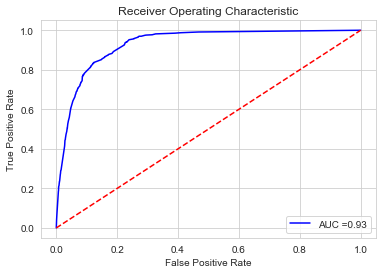

In [105]:
predictProbTest = gbc2.predict_proba(X_test)

# calculate the fpr and tpr for all thresholds of the classification
preds = predictProbTest[:,1]
fpr,tpr,threshold = roc_curve(y_test, preds)
roc_auc = auc(fpr, tpr)

# merhod I: plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr,tpr,'b', label ='AUC ={}'.format(round(roc_auc,2)))
plt.legend(loc='lower right')
plt.plot([0, 1], [0,1], 'r--')
# plt.xlim([0, 1])
# plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

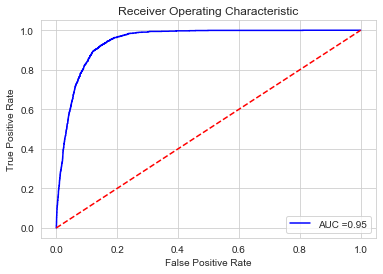

In [108]:
predictProbTest = gbc.predict_proba(X_test)

# calculate the fpr and tpr for all thresholds of the classification
preds = predictProbTest[:,1]
fpr,tpr,threshold = roc_curve(y_test, preds)
roc_auc = auc(fpr, tpr)

# merhod I: plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr,tpr,'b', label ='AUC ={}'.format(round(roc_auc,2)))
plt.legend(loc='lower right')
plt.plot([0, 1], [0,1], 'r--')
# plt.xlim([0, 1])
# plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# Business Solution 1

If company focuses on increasing revenue that means getting new potential client to subscribe term deposit, then  False negative numbers have to low.
False negative means our model predict the clients will not subscribe our product, but actually they will. Recall for Yes(1) and Precision for No(0) have to high.


In [110]:
listItem=[]
for item1,item2,item3 in zip(tpr,fpr,threshold):
    listItem.append([item1,item2,item3])
dftpr=pd.DataFrame(columns=['TPR','FPR','Threshold'],data=listItem)

dftpr[3720:3741]

,TPR,FPR,Threshold
3720,1.0,0.987669,0.002669
3721,1.0,0.987856,0.002665
3722,1.0,0.988136,0.002650
3723,1.0,0.988977,0.002646
3724,1.0,0.989631,0.002632
3725,1.0,0.990191,0.002602
3726,1.0,0.990285,0.002582
3727,1.0,0.993087,0.002560
3728,1.0,0.993181,0.002545
3729,1.0,0.993741,0.002516


In [125]:
predictTreshold=[]
for item in predictProbTest:
    if item[1]>= 0.1:
        predictTreshold.append(1)
    else:
        predictTreshold.append(0)

con = pd.DataFrame(data=confusion_matrix(y_test, predictTreshold), columns=['P No', 'P Yes'],
                  index = ['A No', 'A Yes']);
print(con)

print(classification_report(y_test,predictTreshold))

       P No  P Yes
A No   8993   1712
A Yes    87   1267
              precision    recall  f1-score   support

           0       0.99      0.84      0.91     10705
           1       0.43      0.94      0.58      1354

    accuracy                           0.85     12059
   macro avg       0.71      0.89      0.75     12059
weighted avg       0.93      0.85      0.87     12059



The company will get new 1712 costumer who will subscribe term deposit. but there will be unnecessary marketing cost
for 1267 clients.

# Business Solution 2

If the company want to decrease marketing cost by only calling potential client who will subscribe term deposite, we have to focus by maximizing true negative and minimizing false positive.
False Positive  means the client will NOT SUBSCRIBED to term deposit, but the model thinks it did.
Thus there are no/little unnecessary marketing cost spent.
so, recall for No (0) has to high.

In [114]:
listItem=[]
for item1,item2,item3 in zip(tpr,fpr,threshold):
    listItem.append([item1,item2,item3])
dftpr=pd.DataFrame(columns=['TPR','FPR','Threshold'],data=listItem)

dftpr[10:20]

,TPR,FPR,Threshold
10,0.013294,0.000560,0.914377
11,0.013294,0.000654,0.914273
12,0.017725,0.000654,0.908649
13,0.017725,0.000747,0.908522
14,0.031019,0.000747,0.895718
15,0.031019,0.000841,0.895661
16,0.034712,0.000841,0.892453
17,0.034712,0.000934,0.891756
18,0.042097,0.000934,0.887078
19,0.042097,0.001028,0.886813


In [132]:
predictTreshold=[]
for item in predictProbTest:
    if item[1]>= 0.6:
        predictTreshold.append(1)
    else:
        predictTreshold.append(0)


con = pd.DataFrame(data=confusion_matrix(y_test, predictTreshold), columns=['P No', 'P Yes'],
                  index = ['A No', 'A Yes']);
print(con)

print(classification_report(y_test,predictTreshold))

        P No  P Yes
A No   10494    211
A Yes    902    452
              precision    recall  f1-score   support

           0       0.92      0.98      0.95     10705
           1       0.68      0.33      0.45      1354

    accuracy                           0.91     12059
   macro avg       0.80      0.66      0.70     12059
weighted avg       0.89      0.91      0.89     12059



If the company want to decrease marketing cost by only calling potential client who will subscribe term deposite, 
we have to focus by minimizing false positive. 

Company will only call 211+452 potential clients. 
There are 452 clients will subscribe our product and we save money by not call 10494+902 people, 
but we will lose 902 potential client because we don't call them. 